In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
X, y = make_classification(
    n_samples=1800,
    n_classes=3,
    n_clusters_per_class=1,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=50
)

X = pd.DataFrame(X)
X

,0,1
0,0.440012,-2.300197
1,1.321404,1.774453
2,0.816309,1.858987
3,1.018436,-0.739348
4,1.569294,-1.428081
...,...,...
1795,1.780886,-2.262749
1796,1.106726,-0.194915
1797,1.563437,0.579967
1798,-2.013661,0.931375


In [38]:
x_scalar = MinMaxScaler().fit_transform(X)

In [39]:
pd.DataFrame(x_scalar).sample(n = 4)

,0,1
882,0.762400,0.434168
219,0.774902,0.138168
403,0.767593,0.228491
1668,0.717382,0.452867


In [40]:
centroid = []
def kRandomCentroids(data, k):
    # for i in range(k):
    #     centroid.append(pd.DataFrame(data).apply(lambda x: float(x.sample())))
    # return pd.concat(centroid, axis=1)
    return pd.DataFrame(data).sample(n = k).T
randomCentroids = kRandomCentroids(x_scalar, 4)
randomCentroids

,151,749,225,1433
0,0.534092,0.423860,0.427521,0.682234
1,0.389453,0.560152,0.663693,0.616461


In [41]:
x_scalar = pd.DataFrame(x_scalar)
x_scalar

,0,1
0,0.666985,0.063973
1,0.774230,0.599778
2,0.712771,0.610894
3,0.737366,0.269221
4,0.804392,0.178654
...,...,...
1795,0.830138,0.068898
1796,0.748108,0.340812
1797,0.803679,0.442707
1798,0.368430,0.488916


In [42]:
randomCentroids.columns = ['A', 'B', 'C', 'D']
randomCentroids

,A,B,C,D
0,0.534092,0.423860,0.427521,0.682234
1,0.389453,0.560152,0.663693,0.616461


In [43]:
def euclidianDistance(randomCentroids, data):
    return randomCentroids.apply(lambda x: np.sqrt((data - x) ** 2).sum(axis=1))
distances = euclidianDistance(randomCentroids, x_scalar)
distances

,A,B,C,D
0,0.458373,0.739303,0.839183,0.567737
1,0.450463,0.389995,0.410623,0.108678
2,0.400121,0.339653,0.338048,0.036104
3,0.323506,0.604437,0.704316,0.402371
4,0.481099,0.762030,0.861909,0.559964
...,...,...,...,...
1795,0.616602,0.897532,0.997412,0.695467
1796,0.262658,0.543588,0.643468,0.341523
1797,0.322842,0.497265,0.597144,0.295199
1798,0.265125,0.126667,0.233868,0.441349


In [44]:
distances.apply(lambda row: distances.columns[row.argmin()], axis=1)

0       A
1       D
2       D
3       A
4       A
       ..
1795    A
1796    A
1797    D
1798    B
1799    D
Length: 1800, dtype: object

In [45]:
def makeCluster(distances):
    cluster = []
    for i in range(distances.shape[0]):
        cluster.append((distances.iloc[i, :].argmin(), i))
    return pd.DataFrame(cluster)
    # return pd.DataFrame(distances.apply(lambda row: distances.columns[row.argmin()], axis=1))
cluster = makeCluster(distances)
cluster

,0,1
0,0,0
1,3,1
2,3,2
3,0,3
4,0,4
...,...,...
1795,0,1795
1796,0,1796
1797,3,1797
1798,1,1798


In [46]:
def makeNewCentroid(cluster, x_scalar, k):
    newCentroid = []
    for i in range(k):
        lis = []
        for j in range(cluster.shape[0]):
            if cluster.iloc[j, 0] == i:
                lis.append(x_scalar.iloc[cluster.iloc[j,1], :])
        lis = pd.DataFrame(lis)
        f1 = np.mean(lis.iloc[:, 0])
        f2 = np.mean(lis.iloc[:, 1])
        newCentroid.append((f1, f2))
    return pd.DataFrame(newCentroid).T
newCentroid = makeNewCentroid(cluster, x_scalar, 4)
newCentroid


,0,1,2,3
0,0.685885,0.406737,0.389587,0.732422
1,0.297124,0.533120,0.689145,0.529940


In [47]:
# pd.DataFrame(newCentroid.apply(lambda x: randomCentroids.T - x, axis=1)).iloc[0,0]

In [48]:
def kmeans(k):
    global centroid, cluster, distances
    iteration = 1
    centroid = kRandomCentroids(x_scalar, k)
    oldCentroid = pd.DataFrame()
    while iteration <= 50 and not centroid.equals(oldCentroid):
        oldCentroid = centroid
        distances = euclidianDistance(centroid, x_scalar)
        cluster = makeCluster(distances)
        centroid = makeNewCentroid(cluster, x_scalar, k)
        iteration += 1
        # print(centroid)
kmeans(4)
centroid

,0,1,2,3
0,0.390692,0.784869,0.724794,0.61117
1,0.560276,0.485648,0.230447,0.47664


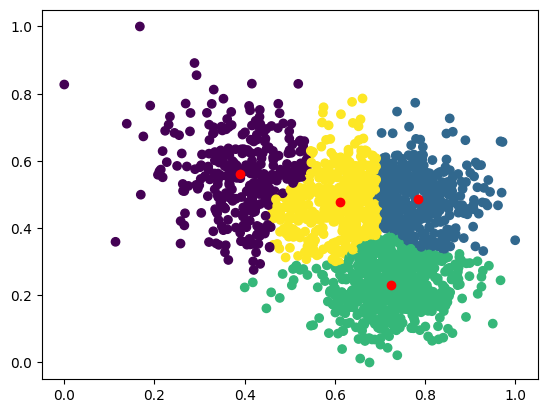

In [49]:
plt.scatter(x_scalar.iloc[:, 0], x_scalar.iloc[:, 1], c=cluster.iloc[:, 0])
plt.scatter(centroid.iloc[0, :], centroid.iloc[1,:], c='red')

In [33]:
wcss = []
def elbowMethod():
    global centroid, distances, cluster

    for i in range(1, 11):
        centroidToAllPoint = []
        kmeans(i)
        for j in range(distances.shape[0]):
            centroidToAllPoint.append(min(distances.iloc[j,:]))
        wcss.append(sum(centroidToAllPoint))
elbowMethod()
wcss

[455.6106542521172,
 323.763265318764,
 250.3560831062544,
 227.23486897413818,
 209.98099168991573,
 193.88276081017102,
 183.13688924949346,
 167.13539325178255,
 160.113197281494,
 154.95531819023972]

<Axes: >

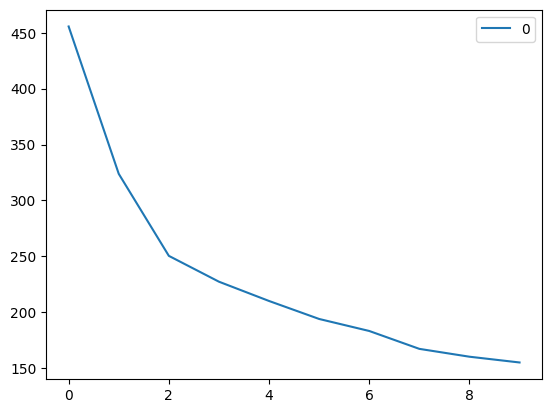

In [34]:
pd.DataFrame(wcss).plot(kind='line')

In [35]:
silhouette_score(x_scalar, cluster.iloc[:, 0])

0.3047848827059949